In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import shap

In [2]:
# Hyperparameters
num_epochs = 10
learning_rate = 0.001
batch_size = 100
num_classes = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = transforms.Compose([
    transforms.Resize(224),  
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,)),  # Normalize grayscale images
])
print(device)
model_save_path = "resnet18_fmnist.pth"  # Path to save model weights


cuda


In [14]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
# Load ResNet-18 model
model = torchvision.models.resnet18(pretrained=False)  # You can use pretrained=True for a pre-trained model
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model.fc = nn.Linear(model.fc.in_features, num_classes) 
model = model.to(device)

In [ ]:
batch = next(iter(test_loader))
images, _ = batch

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

def train():
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, '
              f'Accuracy: {100.*correct/total:.2f}%')

    torch.save(model.state_dict(), model_save_path)
    print(f"Model weights saved to {model_save_path}")



In [ ]:
def test():
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient computation during inference
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    print(f'Test Accuracy: {100. * correct / total:.2f}%')



In [ ]:
# Main script: Train and evaluate the model
if __name__ == '__main__':
    print("Training ResNet-18 on Fashion-MNIST dataset...")
    train()

In [ ]:
if __name__ == '__main__':
    print("Testing ResNet-18 on Fashion-MNIST dataset...")
    test()

In [4]:
model = torchvision.models.resnet18(pretrained=False)
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) 
model.fc = torch.nn.Linear(model.fc.in_features, 10)  
 #   if isinstance(module, nn.ReLU):
  #      module.inplace = False
model.load_state_dict(torch.load('resnet18_fmnist.pth'))  # Load your trained model weights
model = model.to(device)
model.eval()  

/home/uav/anaconda3/envs/thor/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/uav/anaconda3/envs/thor/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [19]:


transform = transforms.Compose([
    transforms.Resize(224),  # ResNet requires input size 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,)),  # Normalize grayscale images
])

test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

X_test = next(iter(test_loader))[0]  # This will give a batch of test images
# X_test = X_test.permute(0, 2, 3, 1).cpu().numpy()  # Convert PyTorch tensor to numpy (HWC format)

masker = shap.maskers.Image("inpaint_telea", X_test[0].shape)



In [21]:
X_test.shape

torch.Size([100, 1, 224, 224])

2024-11-01 17:45:57.382208: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-01 17:45:57.388126: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-01 17:45:57.394357: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-01 17:45:57.396643: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-01 17:45:57.402748: I tensorflow/core/platform/cpu_feature_guar

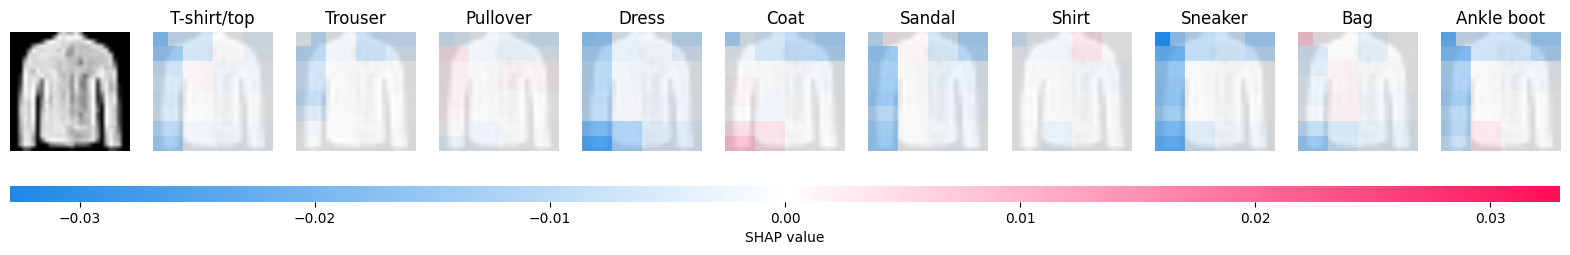

In [6]:
def f(x):
    x_tensor = torch.tensor(x, dtype=torch.float32).permute(0, 3, 1, 2).to(device)  # HWC -> NCHW
    with torch.no_grad():
        return model(x_tensor).cpu().numpy()

# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create the SHAP explainer with the model and image masker
explainer = shap.Explainer(f, masker, output_names=class_names)

# Explain two images using SHAP
shap_values = explainer(X_test[50:51], max_evals=100, batch_size=1)

# Plot the SHAP values for the images
shap.image_plot(shap_values, X_test[50:51])


In [ ]:
shap_values.shape

In [ ]:

#import numpy as np
#background = X_test[np.random.choice(X_test.shape[0], 100, replace=False)]

test_images = torch.tensor(X_test).to(device)
e = shap.DeepExplainer(model,test_images)

shap_values = e.shap_values(test_images, check_additivity=False)

test_images_numpy = test_images.permute(0, 2, 3, 1).cpu().numpy() 

shap.image_plot([shap_values], test_images_numpy)

In [13]:
type(X_test)

numpy.ndarray

In [10]:
background.shape

(100, 224, 224, 1)

In [20]:
!pip install numpy


In [17]:
import shap
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST

# Check for device (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the pretrained ResNet18 model and modify it for Fashion MNIST (1 channel, 10 classes)
model = torchvision.models.resnet18(pretrained=False)
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model.fc = torch.nn.Linear(model.fc.in_features, 10)  # 10 classes for Fashion MNIST
model = model.to(device)

# Set model to evaluation mode
model.eval()

# Data transformations (resize and normalize for ResNet18)
transform = transforms.Compose([
    transforms.Resize(224),  # ResNet requires input size of 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))  # Normalize grayscale images
])

# Load Fashion MNIST dataset
train_dataset = FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = FashionMNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

# Select a small set of background images from the training data (for SHAP's DeepExplainer)
background = next(iter(train_loader))[0][:100].to(device)  # Use 100 random images as background

# Get a batch of test images for SHAP explanation
test_images = next(iter(test_loader))[0][:5].to(device)  # Use 5 random test images

# Initialize SHAP's DeepExplainer with the model and background data
e = shap.DeepExplainer(model, background)

# Compute SHAP values for the test images
shap_values = e.shap_values(test_images)

# Convert test images to numpy (HWC format) for visualization
test_images_numpy = test_images.permute(0, 2, 3, 1).cpu().numpy()  # Convert NCHW -> HWC for SHAP plotting

# Plot SHAP values for the test images
shap.image_plot([shap_values], test_images_numpy)


/home/uav/anaconda3/envs/thor/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/uav/anaconda3/envs/thor/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


RuntimeError: Output 0 of BackwardHookFunctionBackward is a view and is being modified inplace. This view was created inside a custom Function (or because an input was returned as-is) and the autograd logic to handle view+inplace would override the custom backward associated with the custom Function, leading to incorrect gradients. This behavior is forbidden. You can fix this by cloning the output of the custom Function.

In [24]:
import shap
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch import nn

# Ensure your model is loaded and modified for Fashion MNIST (1 channel, 10 classes)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torchvision.models.resnet18(pretrained=False)
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model.fc = nn.Linear(model.fc.in_features, 10)  # 10 classes for Fashion MNIST

# Fix: Ensure all ReLU layers have inplace=False
for module in model.modules():
    if isinstance(module, nn.ReLU):
        module.inplace = False

model = model.to(device)
model.eval()

# Data transformations
transform = transforms.Compose([
    transforms.Resize(224),  # ResNet requires input size of 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))  # Normalize grayscale images
])

# Load Fashion MNIST dataset
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

# Get test images and convert to tensors
X_test = next(iter(test_loader))[0].to(device)

# Select 100 random background images as tensors
background = X_test[torch.randperm(X_test.shape[0])[:100]]

# Get a batch of test images for SHAP explanation
test_images = X_test[:5]

# Define a wrapper function for the model prediction to clone outputs and avoid in-place modifications
def f(x):
    # Convert numpy input to PyTorch tensor and permute it to NCHW (Channels, Height, Width) format
    x_tensor = torch.tensor(x, dtype=torch.float32).permute(0, 3, 1, 2).to(device)
    
    with torch.no_grad():
        # Forward pass: Get the model's output
        output = model(x_tensor).cpu()
        
        # Fix: Clone the output to avoid in-place modification issues with views
        return output.clone().numpy()  # Clone and return the output as a numpy array

# Initialize SHAP's DeepExplainer with the model and background data
e = shap.DeepExplainer(model, background)

# Compute SHAP values for the test images
shap_values = e.shap_values(test_images)

# Convert test images to numpy (HWC format) for visualization
test_images_numpy = test_images.permute(0, 2, 3, 1).cpu().numpy()  # Convert NCHW -> HWC for SHAP plotting

# Plot SHAP values for the test images
shap.image_plot([shap_values], test_images_numpy)




RuntimeError: Output 0 of BackwardHookFunctionBackward is a view and is being modified inplace. This view was created inside a custom Function (or because an input was returned as-is) and the autograd logic to handle view+inplace would override the custom backward associated with the custom Function, leading to incorrect gradients. This behavior is forbidden. You can fix this by cloning the output of the custom Function.

In [28]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import shap

# Custom ResNet18 class to avoid in-place modification errors by cloning tensors
class CustomResNet18(nn.Module):
    def __init__(self, original_model):
        super(CustomResNet18, self).__init__()
        self.model = original_model
    
    def forward(self, x):
        # Forward pass with cloning to avoid in-place modification issues
        x = self.model.conv1(x)
        x = self.model.bn1(x)
        x = self.model.relu(x)
        
        # Clone to avoid in-place modification errors
        x = x.clone()

        x = self.model.maxpool(x)
        x = self.model.layer1(x)
        x = self.model.layer2(x)
        x = self.model.layer3(x)
        x = self.model.layer4(x)
        x = self.model.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.model.fc(x)
        return x

# Load and modify ResNet18 model for a single-channel input (grayscale)
model = torchvision.models.resnet18(pretrained=False)
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model.fc = nn.Linear(model.fc.in_features, 10)  # Modify the output layer for 10 classes

# Wrap the model to ensure no in-place modifications
model = CustomResNet18(model).to(device)

# Load Fashion MNIST dataset (grayscale images)
transform = transforms.Compose([
    transforms.Resize(224),  # Resize to 224x224 for ResNet18 input
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))  # Normalize grayscale images
])

# Load the test dataset
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

# Get a batch of test images for SHAP
X_test = next(iter(test_loader))[0].to(device)

# Select 100 random background images from the test dataset for SHAP
background = X_test[torch.randperm(X_test.shape[0])[:100]]

# Initialize SHAP's DeepExplainer for PyTorch
e = shap.DeepExplainer(model, background)

# Compute SHAP values for the first 5 test images
test_images = X_test[:5]
shap_values = e.shap_values(test_images)

# Convert test images to NumPy (HWC format) for visualization with SHAP
test_images_numpy = test_images.permute(0, 2, 3, 1).cpu().numpy()  # Convert NCHW -> HWC

# Plot the SHAP values for the test images
shap.image_plot(shap_values, test_images_numpy)



RuntimeError: Output 0 of BackwardHookFunctionBackward is a view and is being modified inplace. This view was created inside a custom Function (or because an input was returned as-is) and the autograd logic to handle view+inplace would override the custom backward associated with the custom Function, leading to incorrect gradients. This behavior is forbidden. You can fix this by cloning the output of the custom Function.